In [1]:
import sys
sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix as solve
from plots import plot_pairing_amplitude, plot_density_of_states

In [2]:
# recrod runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve(mu_orbital = -3.5, orbital_indicator = 's', F_sc_initial_orbital = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermitioan :  True
Iteration nr. 1
delta_diff =  89.00865532346933
Iteration nr. 2
delta_diff =  0.9950982994477993
Iteration nr. 3
delta_diff =  0.33872762452540295
Iteration nr. 4
delta_diff =  0.13617475626745196
Iteration nr. 5
delta_diff =  0.05675409059432138
Iteration nr. 6
delta_diff =  0.021710383294120367
Iteration nr. 7
delta_diff =  0.006061209522705124
Iteration nr. 8
delta_diff =  0.000442306573907824
Iteration nr. 9
delta_diff =  0.0026616548811558612
Iteration nr. 10
delta_diff =  0.0029987349247200933
Iteration nr. 11
delta_diff =  0.002616854966025204
Iteration nr. 12
delta_diff =  0.0020473227117326696
Iteration nr. 13
delta_diff =  0.0015080817031922628
Iteration nr. 14
delta_diff =  0.001069914112357145
Iteration nr. 15
delta_diff =  0.0007402316437894837
Iteration nr. 16
delta_diff =  0.0005032397493855079
Iteration nr. 17
delta_diff =  0.0003378455787998557
Iteration nr. 18
delta_diff =  0.00022473179177105813
Iteration nr. 19
delta_diff =  0.00014847357160164095

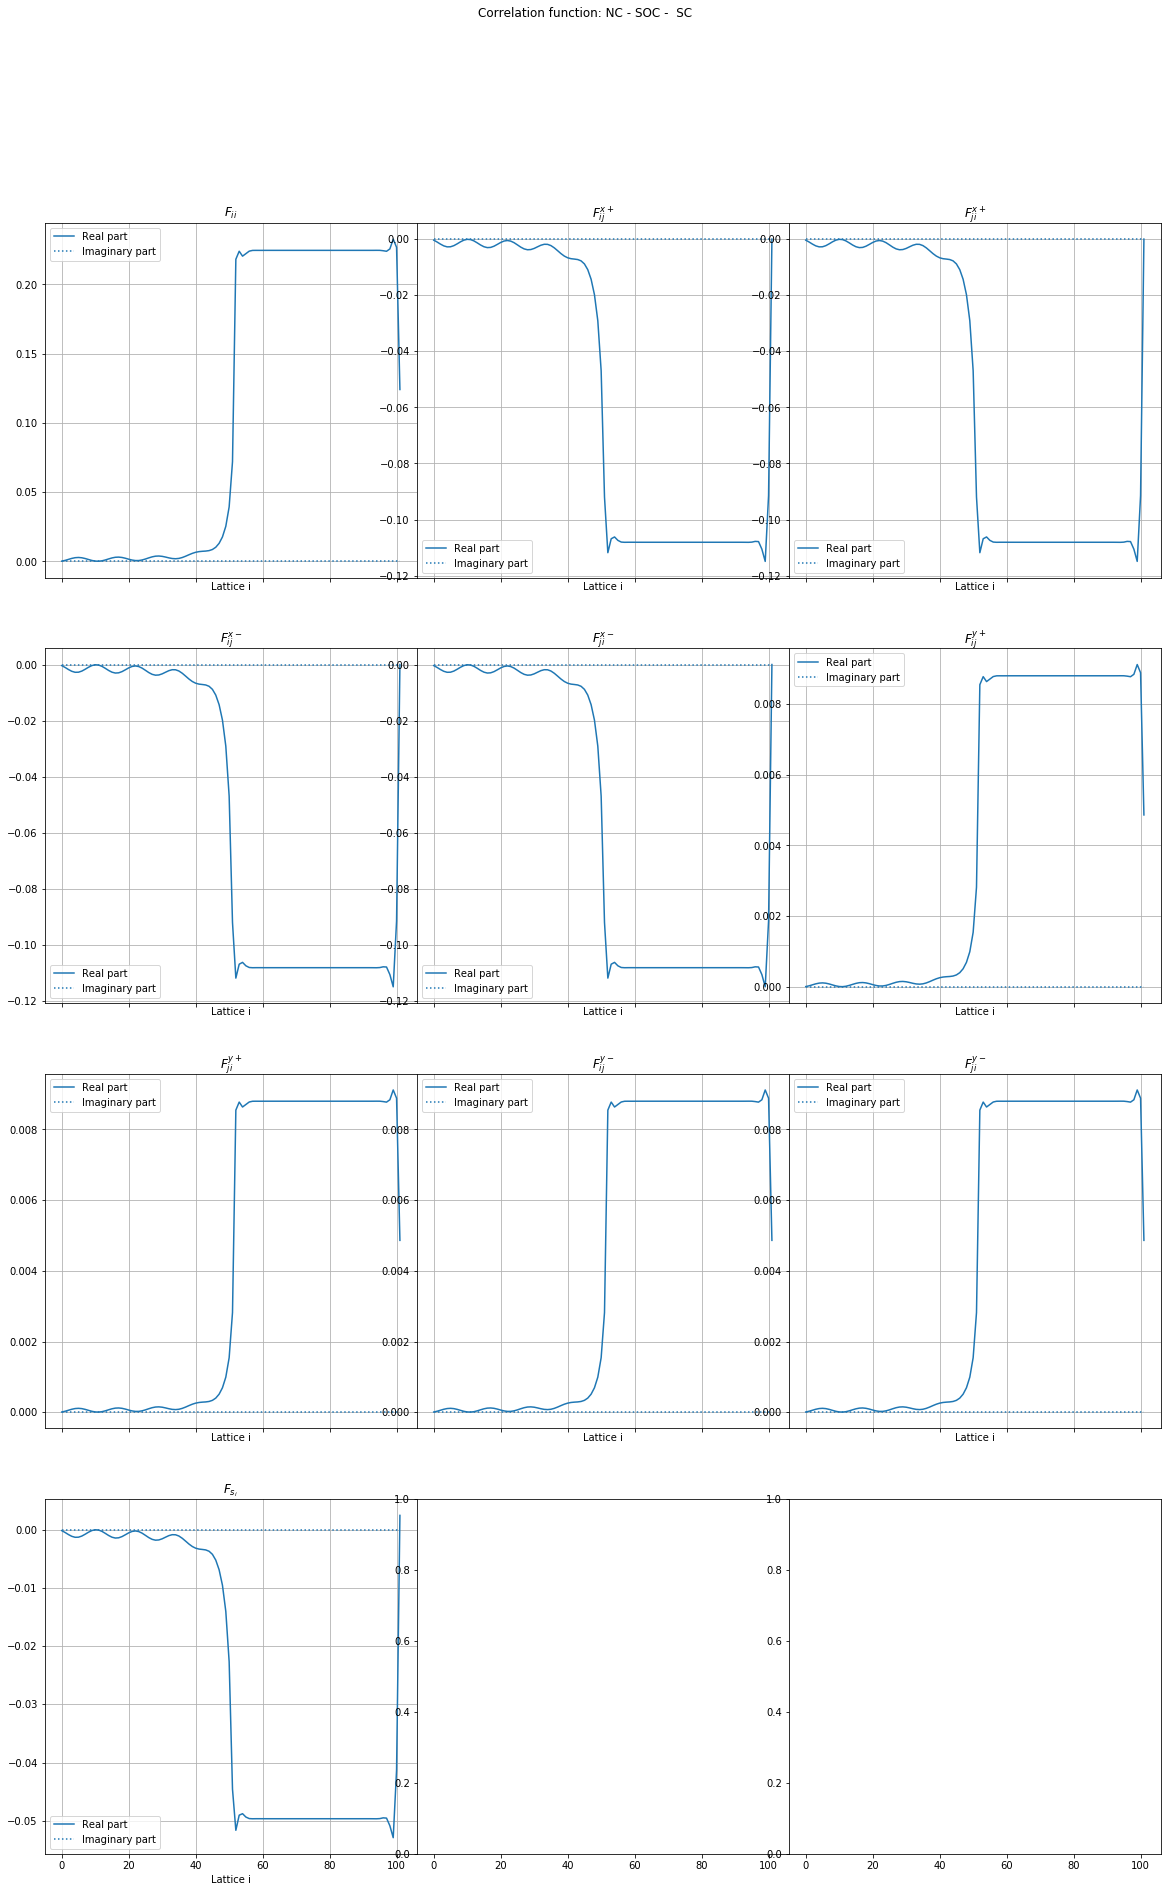

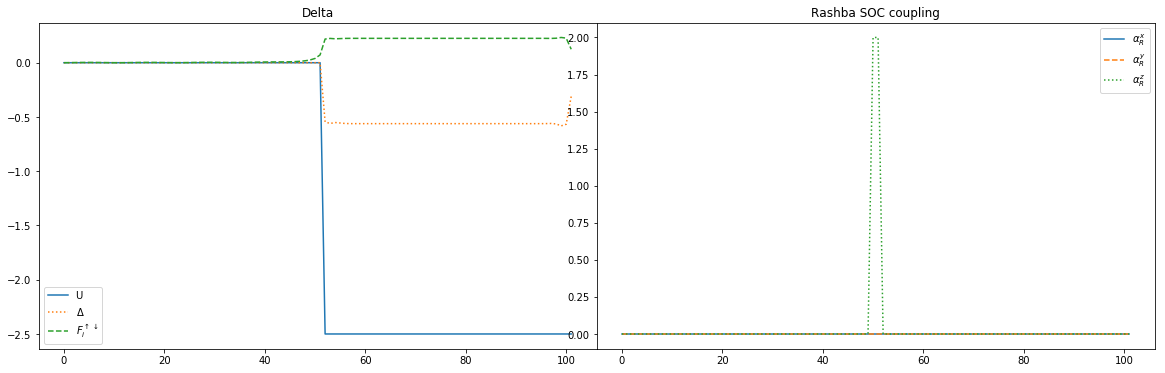

In [3]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

In [4]:
# recrod runtime
import timeit
start = timeit.default_timer()

ldos, es = system.ldos_from_problem(0.01, 0.03, -1, 1)

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  12.450590666005155


In [5]:
print(ldos.shape)
print(es.shape)

(102, 200)
(200,)


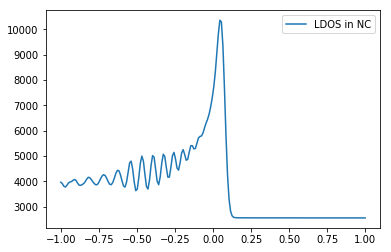

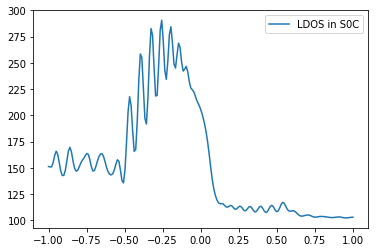

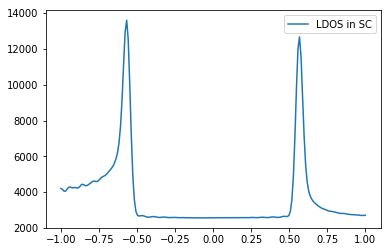

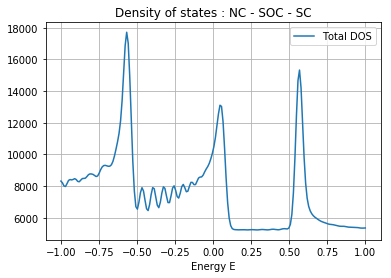

In [6]:
plot_density_of_states(es, ldos)

In [7]:
import numpy as np
a = np.ones((4,4))
b = np.ones((5,5))

In [8]:
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
        b[j][i] += i*5+j
        
print(a)
print(b)

[[ 1.  2.  3.  4.]
 [ 3.  4.  5.  6.]
 [ 5.  6.  7.  8.]
 [ 7.  8.  9. 10.]]
[[ 1.  6. 11. 16.  1.]
 [ 2.  7. 12. 17.  1.]
 [ 3.  8. 13. 18.  1.]
 [ 4.  9. 14. 19.  1.]
 [ 1.  1.  1.  1.  1.]]


In [10]:
a[2:,2:]

array([[ 7.,  8.],
       [ 9., 10.]])

In [6]:
np.tanh(b[2,:])

array([0.99505475, 0.99999977, 1.        , 1.        , 1.        ])

In [15]:
np.sum(a[0,:]*b[2,:])

245.0

In [14]:
np.matmul(a[0,:],b[2,:])

245.0